In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
customer_data = pd.read_csv('/content/electronics_shop_customer_data_electronics.csv')  # Update your dataset name
product_data = pd.read_csv('/content/electronics_shop_product_data.csv')  # Update your dataset name

In [4]:
# Data Preprocessing
# Handle missing values
customer_data.fillna(method='ffill', inplace=True)
product_data.fillna(method='ffill', inplace=True)

<ipython-input-4-fd9cf3b12aca>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customer_data.fillna(method='ffill', inplace=True)
<ipython-input-4-fd9cf3b12aca>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  product_data.fillna(method='ffill', inplace=True)


In [5]:
# Feature Engineering: Create a total spend feature
customer_data['Total Spend'] = customer_data['Units Purchased'] * customer_data['Price']

In [8]:
# Automatically infer the correct date format
customer_data['Purchase Date'] = pd.to_datetime(customer_data['Purchase Date'], dayfirst=True)

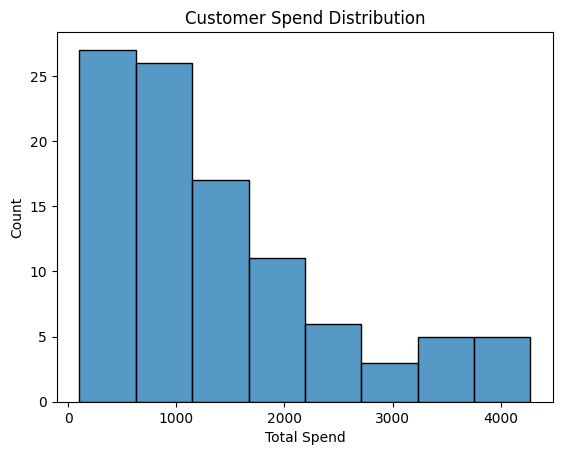

In [9]:
# EDA: Visualize customer distribution
sns.histplot(customer_data['Total Spend'])
plt.title('Customer Spend Distribution')
plt.show()

In [10]:
# Clustering for Segmentation
X = customer_data[['Total Spend', 'Frequency of Purchases']]  # Select features for clustering
kmeans = KMeans(n_clusters=5)  # Set the number of clusters
customer_data['Cluster'] = kmeans.fit_predict(X)

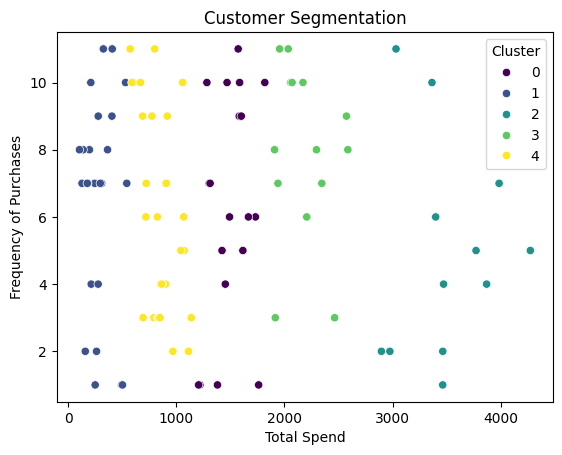

In [11]:
# Visualize the clusters
sns.scatterplot(data=customer_data, x='Total Spend', y='Frequency of Purchases', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()

In [12]:
# ---- Product Analysis ----

# 1. Identify top-selling products (overall)
top_selling_products = product_data.groupby('Product Name').agg({'Units Sold': 'sum'}).sort_values(by='Units Sold', ascending=False)
print("Top 5 selling products:")
print(top_selling_products.head())

Top 5 selling products:
                 Units Sold
Product Name               
Smartwatch             1659
Smart Bulb             1525
Monitor                1235
Television             1158
Washing Machine        1049


In [13]:
# 2. Sales by month
customer_data['Month'] = customer_data['Purchase Date'].dt.month
monthly_sales = customer_data.groupby('Month').agg({'Units Purchased': 'sum'}).sort_values(by='Units Purchased', ascending=False)
print("Monthly sales:")
print(monthly_sales)

Monthly sales:
       Units Purchased
Month                 
4                  120
1                  115
2                  104
3                   98
5                   58


In [14]:
# 3. Most sold product in every month
most_sold_by_month = customer_data.groupby(['Month', 'Product Name']).agg({'Units Purchased': 'sum'}).sort_values(by='Units Purchased', ascending=False).groupby('Month').head(1)
print("Most sold product in every month:")
print(most_sold_by_month)

Most sold product in every month:
                         Units Purchased
Month Product Name                      
1     Keyboard                        31
2     Vacuum Cleaner                  16
3     Smart TV                        16
4     Bluetooth Speaker               15
5     Laptop                          10


In [15]:
# 4. Most sold product category in every month
product_data['Category'] = product_data['Category'].fillna('Unknown')  # Ensure no missing categories
customer_data = customer_data.merge(product_data[['Product Name', 'Category']], on='Product Name', how='left')
most_sold_category_by_month = customer_data.groupby(['Month', 'Category']).agg({'Units Purchased': 'sum'}).sort_values(by='Units Purchased', ascending=False).groupby('Month').head(1)
print("Most sold category in every month:")
print(most_sold_category_by_month)

Most sold category in every month:
                       Units Purchased
Month Category                        
1     Gaming Consoles               90
4     Fans                          67
3     Televisions                   54
2     Gaming Consoles               48
5     Mobile Phones                 26


In [16]:
# 5. Most sold brand in every month
customer_data = customer_data.merge(product_data[['Product Name', 'Brand']], on='Product Name', how='left')
most_sold_brand_by_month = customer_data.groupby(['Month', 'Brand']).agg({'Units Purchased': 'sum'}).sort_values(by='Units Purchased', ascending=False).groupby('Month').head(1)
print("Most sold brand in every month:")
print(most_sold_brand_by_month)

Most sold brand in every month:
               Units Purchased
Month Brand                   
4     Samsung              371
1     Xiaomi               298
5     Xiaomi               260
2     Samsung              211
3     Samsung              186


In [17]:
# 6. Total sales in each month (units sold)
monthly_units_sold = customer_data.groupby('Month').agg({'Units Purchased': 'sum'}).sort_values(by='Units Purchased', ascending=False)
print("Total units sold by month:")
print(monthly_units_sold)

Total units sold by month:
       Units Purchased
Month                 
4                 1328
1                 1100
3                 1009
2                  990
5                  440


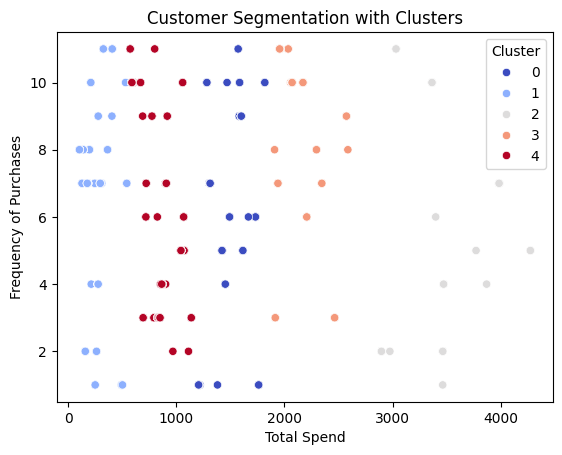

In [18]:
# Visualize the clusters again, if needed
sns.scatterplot(data=customer_data, x='Total Spend', y='Frequency of Purchases', hue='Cluster', palette='coolwarm')
plt.title('Customer Segmentation with Clusters')
plt.show()